In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect


print(X.shape, y.shape)

(50, 1) (50, 1)


In [ ]:
X[:5]

array([[4.17022005e-01],
       [7.20324493e-01],
       [1.14374817e-04],
       [3.02332573e-01],
       [1.46755891e-01]])

In [ ]:
y[:5]

array([[0.88265845],
       [2.88318083],
       [0.0846856 ],
       [0.57567252],
       [0.32364406]])

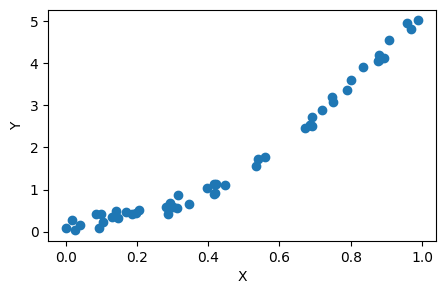

In [ ]:
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

In [ ]:
from sklearn.linear_model import LinearRegression

Adj. R-square: 0.9332371047707784


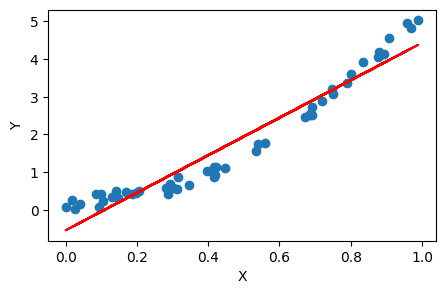

In [ ]:
model = LinearRegression()
model.fit(X,y)

output = model.predict(X)

print('Adj. R-square:', adj_r(r2_score(y,output),X,y ) )

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.plot(X, output, color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
# creating another feature x^2
X_deg2 = np.hstack([X, X**2])
X_deg2.shape

(50, 2)

In [ ]:
X_deg2[:5]

array([[4.17022005e-01, 1.73907352e-01],
       [7.20324493e-01, 5.18867376e-01],
       [1.14374817e-04, 1.30815988e-08],
       [3.02332573e-01, 9.14049845e-02],
       [1.46755891e-01, 2.15372915e-02]])

Adj. R-square: 0.9946802186938059


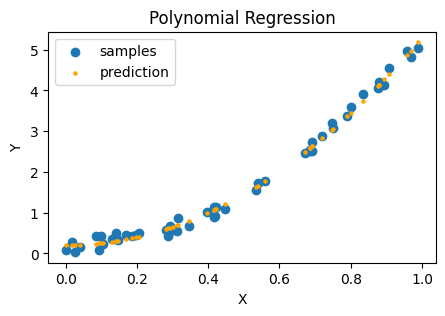

In [ ]:
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2,y)

output = model_deg2.predict(X_deg2)


print('Adj. R-square:', adj_r(r2_score(y,output), X_deg2, y ) )


fig = plt.figure(figsize=(5,3))

plt.scatter(X, y, label = "samples")
plt.scatter(X, output, color='orange', s = 5, label = "prediction")

plt.legend()
plt.title("Polynomial Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

Adj. R-square: 0.9318166176382416


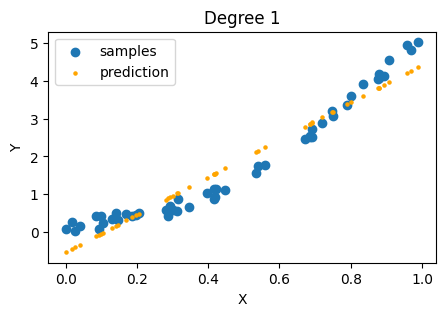

Adj. R-square: 0.994564571274106


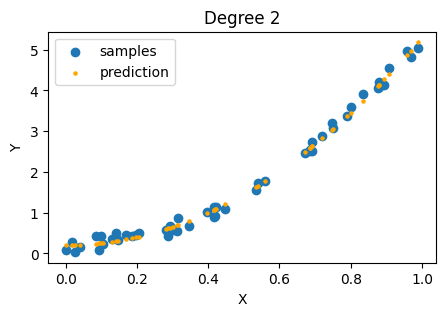

Adj. R-square: 0.9944735532438161


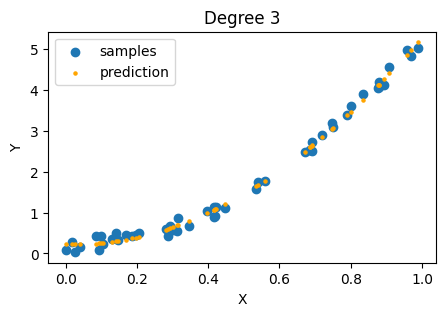

Adj. R-square: 0.9954971261912255


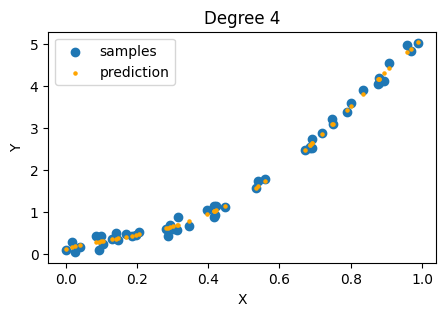

Adj. R-square: 0.995442243943045


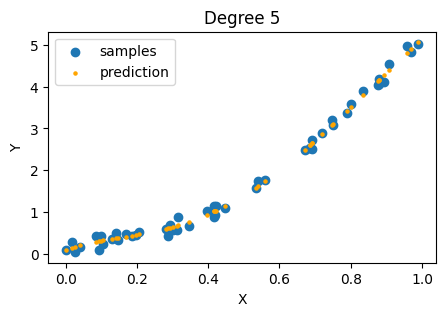

Adj. R-square: 0.9953509779782863


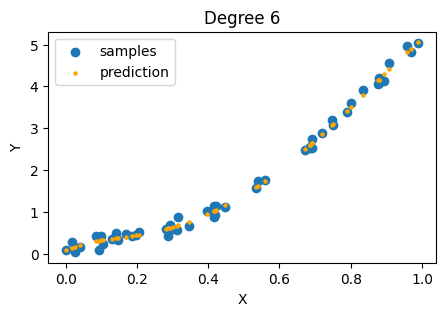

Adj. R-square: 0.9952592325668053


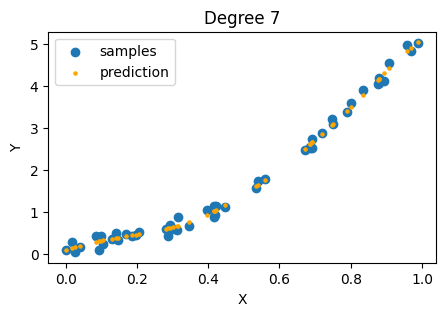

Adj. R-square: 0.9951999334807831


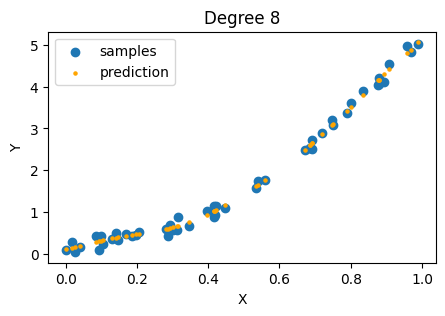

Adj. R-square: 0.9951403796895061


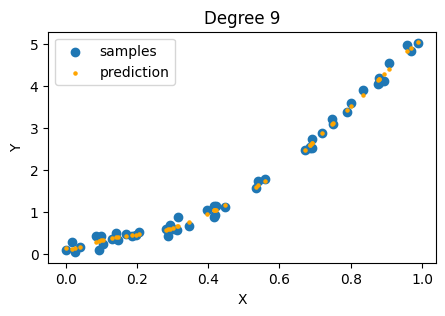

Adj. R-square: 0.995212528048394


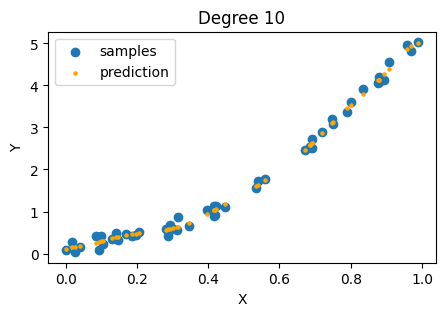

In [ ]:
scores = []

for i in range(1, 11):
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X)

    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly)


    # train Linear regression
    model = LinearRegression()
    model.fit(X_poly_scaled,y)

    output = model.predict(X_poly_scaled)


    score = adj_r(r2_score(y,output),X_poly_scaled,y )
    print('Adj. R-square:', score)

    scores.append(score)

    fig = plt.figure(figsize=(5,3))
    plt.scatter(X, y, label="samples") # original data
    plt.scatter(X, output, label="prediction", color='orange', s = 5) # predictions
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Degree {i}")
    plt.show()

In [ ]:
scores

[0.9318166176382416,
 0.994564571274106,
 0.9944735532438161,
 0.9954971261912255,
 0.995442243943045,
 0.9953509779782863,
 0.9952592325668053,
 0.9951999334807831,
 0.9951403796895061,
 0.995212528048394]

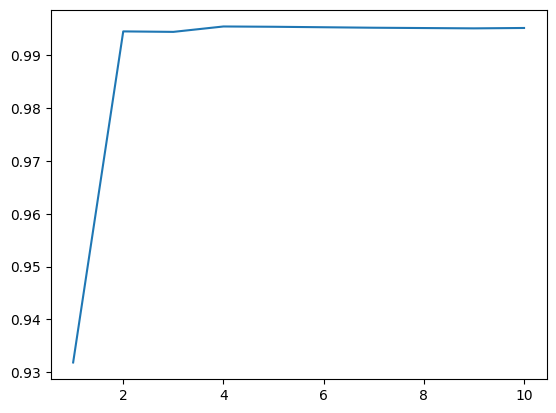

In [ ]:
plt.plot(range(1,11), scores);

# Underfit Overfit Code

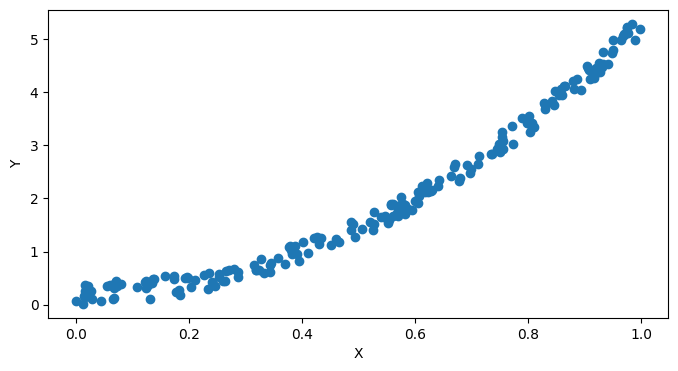

In [ ]:
X = np.random.rand(200,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(200,1)

plt.figure(figsize=(8,4))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
X.shape, y.shape

((200, 1), (200, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
degrees = 30

train_scores = []
test_scores = []

for d in range(1, degrees):

    #creates polynomial feature
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    #Standardization
    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y_train) # only on train dataset.

    # Calculating performance
    adjr2_train = adj_r(model.score(X_poly_scaled,y_train) , X_poly_scaled, y_train)
    adjr2_test = adj_r(model.score(X_test_poly_scaled,y_test) , X_test_poly_scaled, y_test)


    train_scores.append(adjr2_train)
    test_scores.append(adjr2_test)

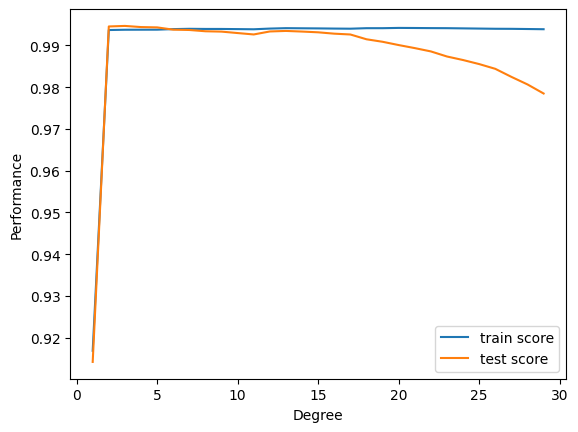

In [ ]:
plt.plot(range(1, 30), train_scores, label="train score")
plt.plot(range(1, 30), test_scores, label="test score")
plt.xlabel("Degree")
plt.ylabel("Performance")
plt.legend()
plt.show()

In [ ]:
np.argmax(test_scores)

2

# Regularisation

In [ ]:
from sklearn import datasets

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
X = diabetes['data']

y = diabetes['target']

In [ ]:
X[:2]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405]])

In [ ]:
X.shape

(442, 10)

In [ ]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transform the features into polynomial features

degree = 5 # very high degree (just for experiment)
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly.shape

(353, 3003)

In [ ]:
X_test_poly.shape

(89, 3003)

In [ ]:
# Standardize the polynomial features
scaler = StandardScaler()

X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_poly_scaled , y_train)

output = model.predict(X_test_poly_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error


print('MSE for test:', mean_squared_error(y_test, output))

output = model.predict(X_train_poly_scaled)
print('MSE for train:', mean_squared_error(y_train, output))

MSE for test: 68178.08439864193
MSE for train: 5.164672793428653e-25


In [ ]:
print("train r2:",model.score(X_train_poly_scaled, y_train))
print("test r2:",model.score(X_test_poly_scaled, y_test))

train r2: 1.0
test r2: -11.86827702089332


In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
ridge_model = Ridge(alpha = 500) # linear regression + regularisation

ridge_model.fit(X_train_poly_scaled , y_train)


ridge_predictions = ridge_model.predict(X_test_poly_scaled)

In [ ]:
print("train r2:",ridge_model.score(X_train_poly_scaled, y_train))
print("test r2:",ridge_model.score(X_test_poly_scaled, y_test))

train r2: 0.7019477141746824
test r2: 0.3814484964798087


In [ ]:
ridge_model.coef_[:30]

array([ 0.        ,  0.94629782, -0.99529889,  3.24717633,  1.5486837 ,
       -0.07452574, -0.50893594, -1.85791237,  1.41416528,  3.33031641,
        1.10257657,  0.53027149,  0.58013163,  0.4022358 ,  0.45634168,
       -0.49384467, -0.7354506 , -0.18280736,  0.20267304,  0.79415803,
        0.96352202, -0.99529889, -0.18411068,  0.48628093,  0.35413882,
        0.27766683,  0.15402138,  0.25649775, -0.02809902, -0.54702395])

In [ ]:
lasso_model = Lasso(alpha=4)

lasso_model.fit(X_train_poly_scaled , y_train)

lasso_predictions = lasso_model.predict(X_test_poly_scaled)

In [ ]:
print("train r2:",lasso_model.score(X_train_poly_scaled, y_train))
print("test r2:",lasso_model.score(X_test_poly_scaled, y_test))

train r2: 0.5653399756652482
test r2: 0.5205219318408205


In [ ]:
lasso_model.coef_[:30]

array([ 0.        ,  0.        , -1.72098491, 17.56864469,  0.        ,
       -0.        , -0.        , -8.33827216,  0.        , 19.7551467 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.06559912, -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ])

In [ ]:
from sklearn.linear_model import ElasticNet